In [2]:
import pandas as pd
from src.helper_methods import kaplan_meier_curves


In [17]:
desa = pd.read_pickle('/Users/Danial/UMCUtrecht/Leuven/Processed/desa.pickle')
desa.sample(1)

,Tx_id,Epitope_Mismatch,DESA_Status,EpvsHLA_Donor,DESA,DESA_num,Relevant_DESA,surv_time_yr,donor_age,rec_age,donor_type,death_censor,repeat_tx,induction,CIT,donor_LD,donor_DCD,donor_DBD
82,3765,"{'44RMA': 'B*15:01', '163LE': 'C*03:03', '66IS...",DESA,{'65GK': 'A*24:02'},{65GK},1,0,1.178082,77.2,72.5,1,0,0,0,18.083333,0,0,1


In [20]:
# Updating the definition of relevant DESA
relevant_desa = {
    '71A', '150AAH', '193AV', '70DA', '114Q', '105S', '74A', '6C',
    '70DRA', '94I', '96HK', '44RME', '144QL', '114H', '149H', '71TD',
    '150AH', '77D'
}
desa['Relevant_DESA'] = desa['DESA'].apply(lambda x: int(bool(x & relevant_desa)))

In [5]:
desa.death_censor.value_counts(normalize=True)

0    0.670213
1    0.329787
Name: death_censor, dtype: float64

31


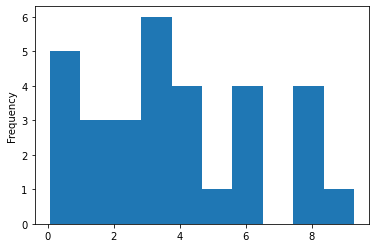

In [6]:
desa[desa.death_censor == 1]['surv_time_yr'].plot.hist()
print(desa[desa.death_censor == 1].shape[0])

63


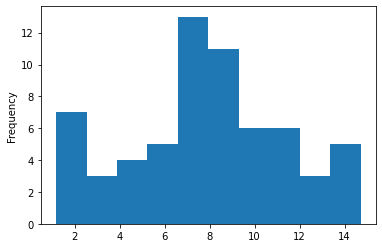

In [7]:
desa[desa.death_censor == 0]['surv_time_yr'].plot.hist()
print(desa[desa.death_censor == 0].shape[0])

In [11]:
time = 10
# def event_policy(df):
#     if df['surv_time_yr'] > time:
#         return 0
#     elif (df['surv_time_yr'] <= time) and (df['death_censor'] == 0):
#         return 1
#     elif (df['surv_time_yr'] <= time) and (df['death_censor'] == 1):
#         return 0  
        
desa = desa.assign(
    T = desa['surv_time_yr'].apply(lambda x: x if x <= time else time + .000001)
).rename(columns={'death_censor':'E'})

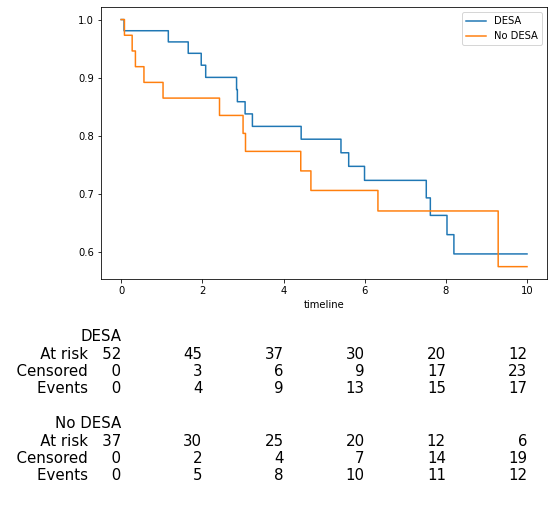

In [12]:
from lifelines import  KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt
import numpy as np

ind_deceased = desa.donor_LD == 0
ind_desa = desa['DESA_Status'] == 'DESA'
data_desa = desa[ind_deceased & ind_desa]
data_no_desa = desa[ind_deceased & ~ind_desa]

timeline = np.linspace(0, 10, 1000)
kmf1 = KaplanMeierFitter(label='DESA')
kmf1.fit(data_desa['T'], event_observed=data_desa['E'], timeline=timeline) 
kmf2 = KaplanMeierFitter(label='No DESA')
kmf2.fit(data_no_desa['T'], event_observed=data_no_desa['E'], timeline=timeline) 

fig, ax = plt.subplots(figsize=(8, 5))
# kmf1.survival_function_ = kmf.survival_function_ * 100 
kmf1.plot(ci_show=False, ax=ax) 
kmf2.plot(ci_show=False, ax=ax) 
add_at_risk_counts(*[kmf1, kmf2], ax=ax, fontsize=15);

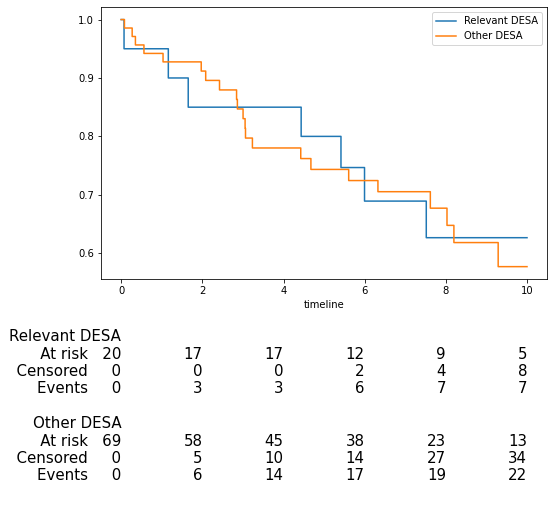

In [13]:
from lifelines import  KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt
import numpy as np

ind_deceased = desa.donor_LD == 0
ind_desa_rel = desa['Relevant_DESA'] == 1
data_desa_rel = desa[ind_deceased & ind_desa_rel]
data_no_desa_rel = desa[ind_deceased & ~ind_desa_rel]

timeline = np.linspace(0, 10, 1000)
kmf1 = KaplanMeierFitter(label='Relevant DESA')
kmf1.fit(data_desa_rel['T'], event_observed=data_desa_rel['E'], timeline=timeline) 
kmf2 = KaplanMeierFitter(label='Other DESA')
kmf2.fit(data_no_desa_rel['T'], event_observed=data_no_desa_rel['E'], timeline=timeline) 

fig, ax = plt.subplots(figsize=(8, 5))
# kmf1.survival_function_ = kmf.survival_function_ * 100 
kmf1.plot(ci_show=False, ax=ax) 
kmf2.plot(ci_show=False, ax=ax) 
add_at_risk_counts(*[kmf1, kmf2], ax=ax, fontsize=15);

In [80]:
desa[['Relevant_DESA', 'death_censor']].value_counts()

Relevant_DESA  death_censor
0              0               50
               1               25
1              0               13
               1                7
dtype: int64

In [83]:

desa[desa.Relevant_DESA ==1][['donor_age', 'rec_age', ]]

,donor_age,rec_age
1,16.4,29.4
2,31.3,53.8
5,40.4,74.9
6,19.7,72.8
7,22.8,41.9
13,70.6,65.1
14,49.9,71.6
15,52.0,49.7
17,60.1,77.7
26,65.6,65.8


In [90]:
desa[desa.Relevant_DESA ==1].donor_DBD.value_counts()

1    16
0     4
Name: donor_DBD, dtype: int64

In [92]:
desa[desa.Relevant_DESA == 0].induction.value_counts()

1    49
0    26
Name: induction, dtype: int64

In [93]:
desa[desa.Relevant_DESA ==1]

,Unnamed: 0,Tx_id,Epitope_Mismatch,DESA_Status,EpvsHLA_Donor,DESA,DESA_num,Relevant_DESA,surv_time_yr,donor_age,...,donor_type,death_censor,repeat_tx,induction,CIT,donor_LD,donor_DCD,donor_DBD,E,T
1,1,2797,"{'76EN': 'B*44:02', '76ET': 'B*44:02', '163LG'...",DESA,"{'76ET': 'B*44:02', '199V': 'B*44:02', '80TLR'...","{'32L', '76ET', '24T', '70DR', '70DA', '199V',...",15,1,14.709589,16.4,...,1,0,1,1,15.466667,0,0,1,0,10.000000
2,2,2801,"{'76VS': 'C*12:03', '73AS': 'C*12:03', '97W': ...",DESA,"{'57DE': 'DRB1*11:04', '11STS': 'DRB1*11:04', ...","{'67F', '57DE', '11STS'}",3,1,14.635616,31.3,...,1,0,1,1,13.183333,0,0,1,0,10.000000
5,5,2838,"{'76VS': 'C*12:03', '80N': 'C*12:03', '156WA':...",DESA,"{'31I': 'DRB5*01:01', '98KN': 'DRB5*01:01', '3...","{'28H', '120N', '31I', '133RS', '98KN', '30D',...",8,1,5.871233,40.4,...,2,0,1,1,36.000000,0,1,0,1,5.871233
6,6,2841,"{'73TVS': 'C*03:03', '21H': 'C*03:03', '91R': ...",DESA,"{'71ATD': 'B*27:05', '76ED': 'B*27:05', '97N':...","{'71ATD', '76ED', '97N'}",3,1,5.994521,19.7,...,1,1,0,0,15.466667,0,0,1,0,5.994521
7,7,2860,"{'163L': 'B*35:01', '12M': 'B*35:01', '163LE':...",DESA,"{'163RW': 'A*11:01', '62QE': 'A*11:01', '152HA...","{'71QS', '62QE', '151AHA', '163RW', '152HA', '...",6,1,14.041096,22.8,...,1,0,1,0,7.433333,0,0,1,0,10.000000
13,13,2907,"{'67VT': 'DQB1*03:01', '55RPD': 'DQB1*06:03', ...",DESA,"{'30H[DR]': 'DRB3*02:02', '31FH': 'DRB1*13:01'...","{'98Q', '55PP', '73G', '55PPD', '45EV', '30H[D...",16,1,4.575342,70.6,...,1,0,0,1,14.666667,0,0,1,1,4.575342
14,14,2963,"{'140TV': 'DRB1*13:01', '96H': 'DRB1*13:01', '...",DESA,"{'41T': 'B*41:02', '45KE': 'B*41:02'}","{'41T', '45KE'}",2,1,7.745205,49.9,...,1,0,0,1,13.850000,0,0,1,1,7.745205
15,15,2974,"{'129QS': 'DQA1*01:01', '25YT': 'DQA1*01:01', ...",DESA,"{'96EV': 'DRB1*01:01', '30C': 'DRB1*01:01'}","{'30C', '96EV'}",2,1,12.909589,52.0,...,1,0,0,1,6.850000,0,0,1,0,10.000000
17,17,2990,"{'193PL': 'C*07:02', '267QE': 'C*07:02', '73AS...",DESA,"{'98E': 'DRB1*04:02', '71E': 'DRB1*04:02', '67...","{'71E', '70R', '70RE', '4Q', '31I', '67I', '98...",15,1,8.676712,60.1,...,2,0,1,0,23.683333,0,1,0,1,8.676712
26,26,3105,"{'16Y': 'DRB1*12:01', '85A': 'DRB1*12:01', '86...",DESA,"{'76ESI': 'A*25:01', '76ET': 'B*44:02', '163LG...","{'71TN', '76ET', '199V', '166ES', '76ESI', '16...",9,1,0.060274,65.6,...,1,1,0,1,16.150000,0,0,1,0,0.060274
